In [1]:
import numpy as np
import cv2

In [2]:

def convolution2d(image, kernel):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    padding_h = (kernel_h - 1) // 2
    padding_w = (kernel_w - 1) // 2
    padded_image = np.pad(image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    output = np.zeros((image_h, image_w))
    
    for i in range(image_h):
        for j in range(image_w):
            new = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(new * kernel)
    return output

image = np.random.rand(8, 4)




In [3]:
image = cv2.imread('chess.png', cv2.IMREAD_GRAYSCALE)

In [4]:
def guassian_filter2d(sigma):
   size = int(2 * (np.pi * sigma))
   if size % 2 == 0:
    size += 1
   kernel = np.zeros((size, size))
   for x in range(size):
       for y in range(size):
           kernel[x, y] = (1/(2 * np.pi * sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2) / (2 * sigma**2))
   return kernel

In [5]:
def harris_corner_detector(img, k):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    a = convolution2d(img, sobel_x)
    b = convolution2d(img, sobel_y)

    A = a * a
    B = b * b
    C = a * b

    guass_value = guassian_filter2d(1.5)
    guass_A = convolution2d(A, guass_value)
    guass_B = convolution2d(B, guass_value)
    guass_C = convolution2d(C, guass_value)

    # Harris response
    R = (guass_A * guass_B - guass_C ** 2) - k * (guass_A + guass_B) ** 2

    # Threshold
    corners = np.zeros_like(R)
    threshold = 0.50 * np.max(R)
    corners[R > threshold] = 1

    return corners, R

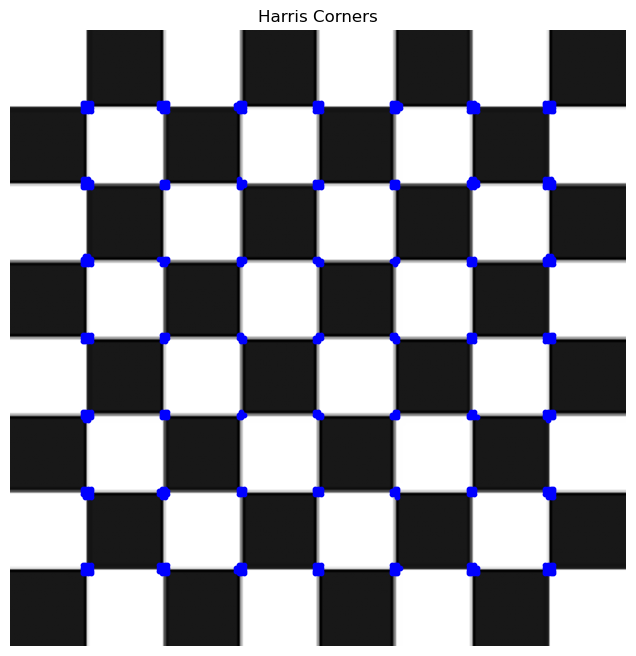

In [6]:
import matplotlib.pyplot as plt



corners, R = harris_corner_detector(image, k=0.04)

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')

y, x = np.where(corners == 1)
plt.scatter(x, y, c='b', s=10)
plt.title('Harris Corners')
plt.axis('off')
plt.show()


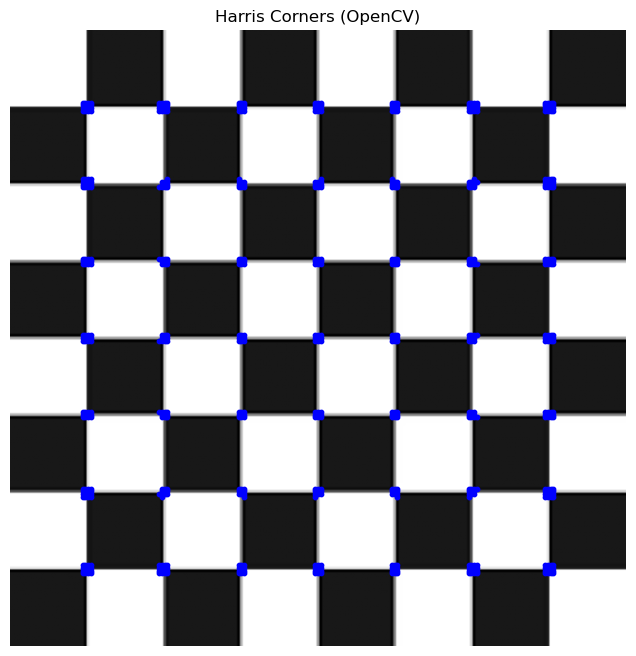

In [7]:
b_corners = cv2.cornerHarris(image,3,3,0.04)

threshold = 0.30 * b_corners.max()  
y, x = np.where(b_corners > threshold)

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.scatter(x, y, c='b', s=10)
plt.title('Harris Corners (OpenCV)')
plt.axis('off')
plt.show()



In [29]:
def shiTomashi(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    a = convolution2d(img, sobel_x)
    b = convolution2d(img, sobel_y)

    A = a * a
    B = b * b
    C = a * b

    guass_value = guassian_filter2d(1.5)
    guass_A = convolution2d(A, guass_value)
    guass_B = convolution2d(B, guass_value)
    guass_C = convolution2d(C, guass_value)


    # Shi-Tomasi (minimum eigenvalue)
    R = 0.5 * ((guass_A + guass_B) - np.sqrt((guass_A + guass_B) ** 2 - 4 * (guass_A * guass_B - guass_C ** 2) + 1e-10))

    # Threshold
    corners = np.zeros_like(R)
    threshold = 0.60 * np.max(R)
    corners[R > threshold] = 1

    return corners, R

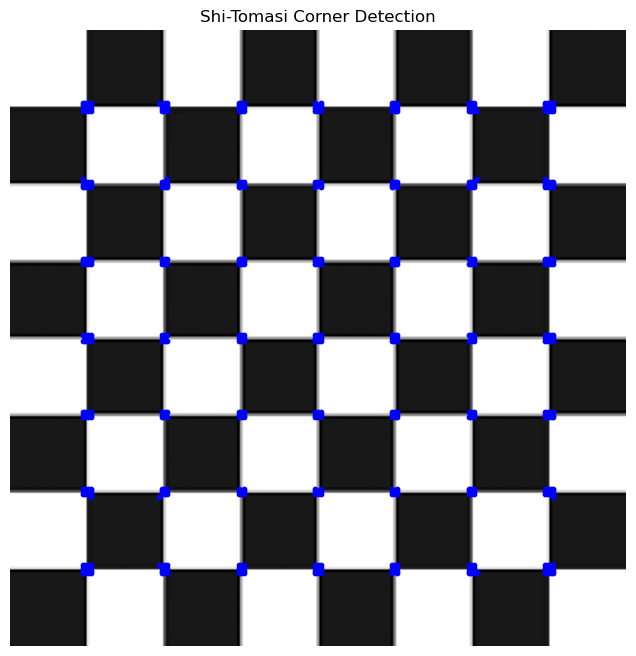

In [30]:
corners, R = shiTomashi(image)

y, x = np.where(corners == 1)  
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.scatter(x, y, c='b', s=10)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()